# Plotting a voltage curve from a folder of res files

This example will create a hull and plot a voltage curve from the computed phases found inside this directory.

In [1]:
# temporarily disables numpy deprecation warnings for CI
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matador.hull import QueryConvexHull
from matador.scrapers.castep_scrapers import res2dict
%matplotlib inline

Successfully scraped 6 out of 6 files.
6 structures found within 0.0 eV of the hull, including chemical potentials.
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                Source                 !?!  Pressure  Cell volume      Hull dist.      Space group      Formula      # fu   Prov.  
                                             (GPa)      (Å³/fu)        (meV/atom)    
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
* P-CollCode150873                              0.01         21.2           0.0           Cmca             P          4      ICSD  
* LiP-ColCode23621                             -0.02        173.2           0.0          I41/acd         LiP₇         8      ICSD  
* LiP-CollCode60774                             0.02        198.4           0.0          P212121         Li₃P₇        4      ICSD  
* LiP-

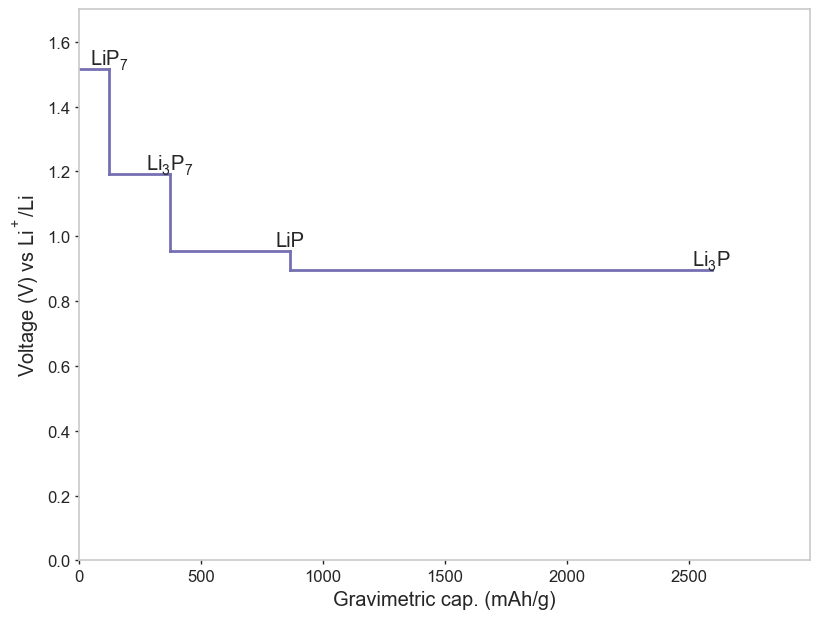

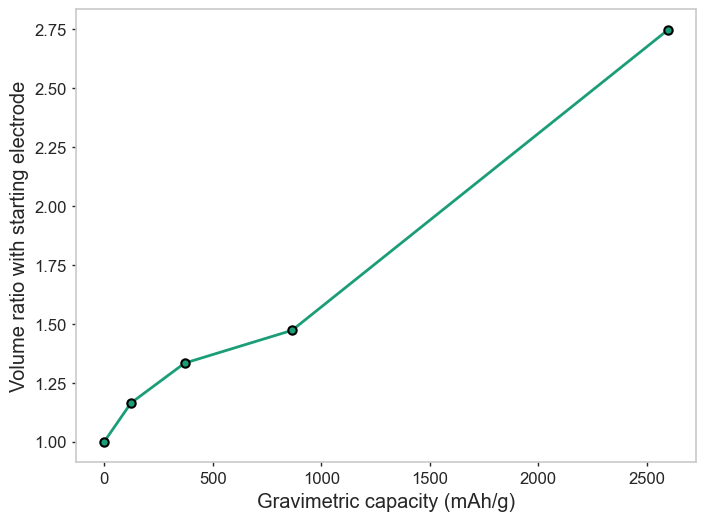

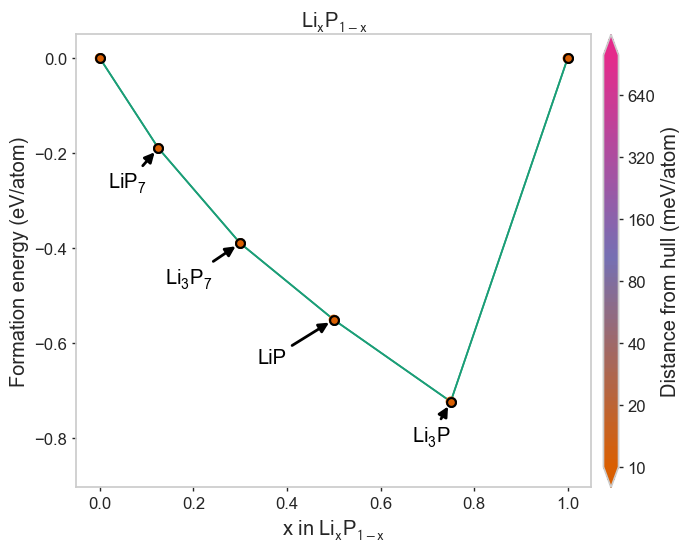

In [3]:
cursor, failures = res2dict("LiP_structures/*.res")

hull = QueryConvexHull(
    cursor=cursor, 
    species=['Li', 'P'], 
    voltage=True, 
    volume=True,
    labels=True,
    plot_kwargs={"labels": True}
)

Successfully scraped 87 out of 87 files.
87 structures found within 0.05 eV of the hull, including chemical potentials.
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                Source                 !?!  Pressure  Cell volume      Hull dist.      Space group      Formula      # fu   Prov.  
                                             (GPa)      (Å³/fu)        (meV/atom)    
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
* K-Na-Collo                                    0.02         73.3           0.0           Im-3m            K          1     SWAPS  
  KSn-LiSn-87104-9995-390                      -0.05        573.0          47.5            R3            K₈Sn         1     AIRSS  
  KP-GA-oeaasw-2x57                            -0.00        971.6          41.8            P1            K₁₃P         1       GA   
  

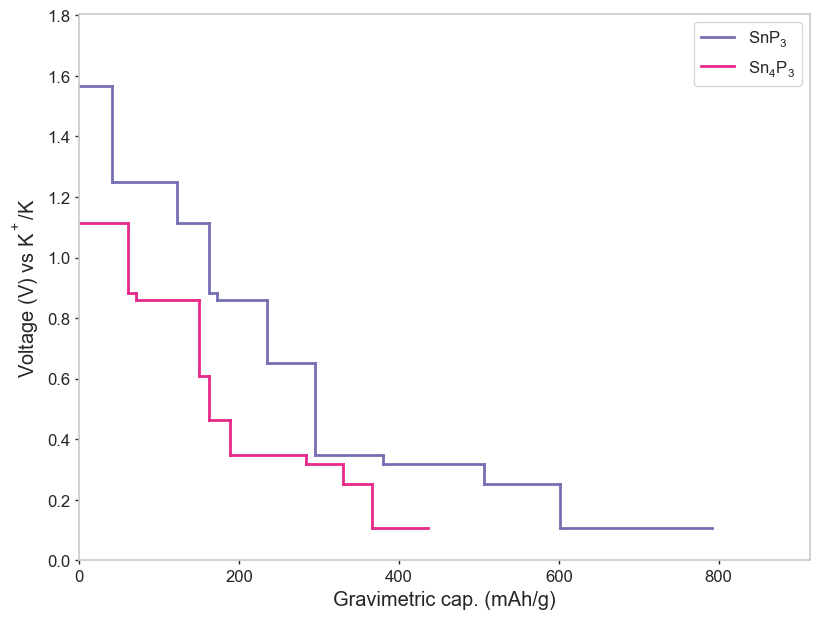

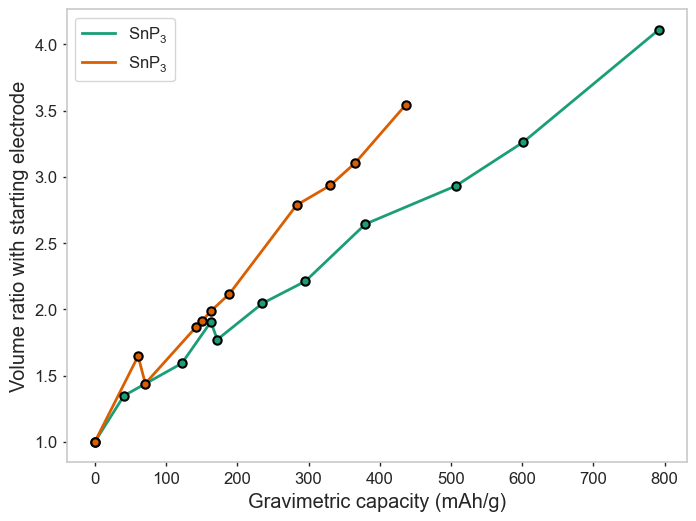

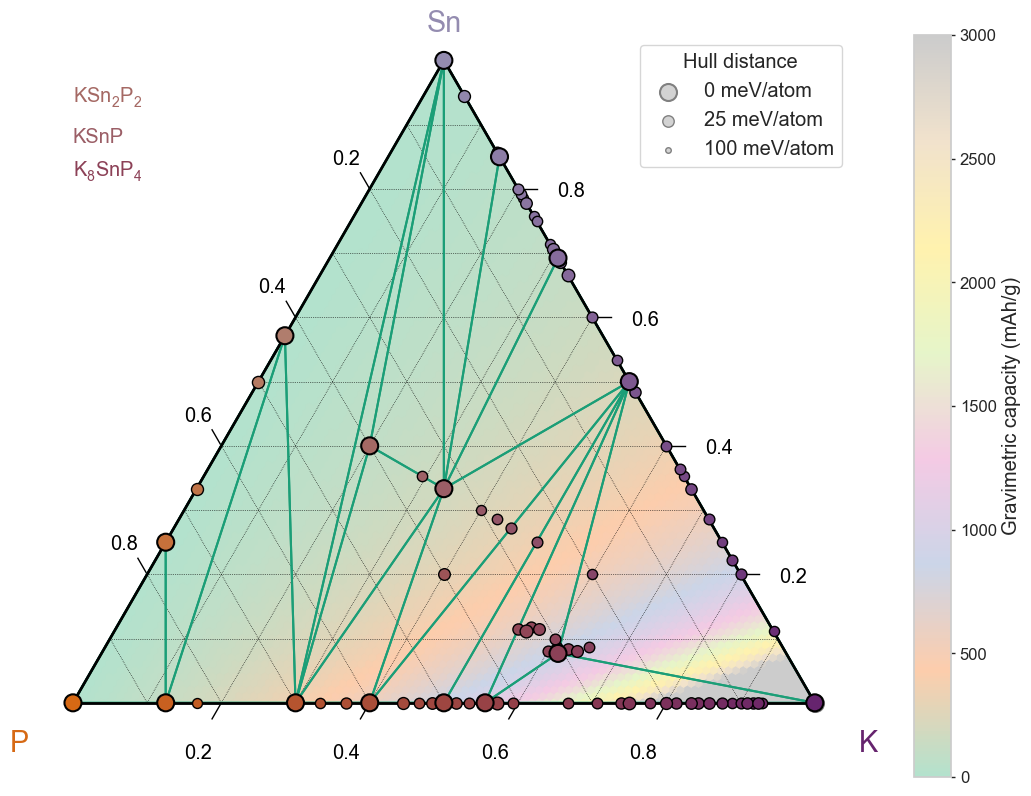

In [4]:
cursor, failures = res2dict("ternary_structures/*.res")

hull = QueryConvexHull(
    cursor=cursor, 
    species="KSnP", 
    voltage=True, 
    capmap=True,
    hull_cutoff=0.05,
    volume=True,
    plot_kwargs={"labels": True, "colour_points_by": "concentration"}
)